In [1]:
import pandas as pd


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [39]:
df = pd.read_csv('data/combined_data_binance_ethusdc.csv')

df = df.drop(['Unnamed: 6', 'is_buyer_maker'], axis=1)
df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time').sort_index()

df['prev_price'] = df['price'].shift(1)

def determine_order_type(row):
    if pd.isna(row['prev_price']):
        return None
    return 'buy' if row['price'] > row['prev_price'] else 'sell'


def adjust_quantity(row):
    if row['order_type'] == 'sell':
        return -row['qty']  # Make the quantity negative for sell orders
    else:
        return row['qty']  # Keep the quantity as is for buy orders
    
    
df['order_type']   = df.apply(determine_order_type, axis=1)
df['adjusted_qty'] = df.apply(adjust_quantity, axis=1)

df.drop(columns=['prev_price'], inplace=True)
df


In [ ]:
ohlc_seconds = df['price'].resample('S').ohlc()
ohlc_seconds

,open,high,low,close
time,,,,
2023-03-12 06:30:00,1482.62,1482.62,1482.62,1482.62
2023-03-12 06:30:01,1677.81,1677.81,1677.81,1677.81
2023-03-12 06:30:02,NaN,NaN,NaN,NaN
2023-03-12 06:30:03,NaN,NaN,NaN,NaN
2023-03-12 06:30:04,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-01-31 23:59:22,NaN,NaN,NaN,NaN
2024-01-31 23:59:23,NaN,NaN,NaN,NaN
2024-01-31 23:59:24,NaN,NaN,NaN,NaN


In [ ]:
ohlc_minutes = df['price'].resample('T').ohlc()
ohlc_minutes

,open,high,low,close
time,,,,
2023-03-12 06:30:00,1482.62,1677.81,1482.62,1495.00
2023-03-12 06:31:00,NaN,NaN,NaN,NaN
2023-03-12 06:32:00,NaN,NaN,NaN,NaN
2023-03-12 06:33:00,NaN,NaN,NaN,NaN
2023-03-12 06:34:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-01-31 23:55:00,2283.40,2283.40,2282.47,2282.53
2024-01-31 23:56:00,2282.53,2282.79,2282.28,2282.79
2024-01-31 23:57:00,2282.69,2282.69,2282.57,2282.57


In [36]:
ohlc_minutes.dropna()

,open,high,low,close
time,,,,
2023-03-12 06:30:00,1482.62,1677.81,1482.62,1495.00
2023-03-12 06:36:00,1539.18,1539.18,1539.18,1539.18
2023-03-12 06:37:00,1539.80,1539.80,1539.80,1539.80
2023-03-12 06:38:00,1539.71,1539.98,1533.87,1539.98
2023-03-12 06:39:00,1535.10,1540.49,1534.28,1534.49
...,...,...,...,...
2024-01-31 23:55:00,2283.40,2283.40,2282.47,2282.53
2024-01-31 23:56:00,2282.53,2282.79,2282.28,2282.79
2024-01-31 23:57:00,2282.69,2282.69,2282.57,2282.57


In [38]:
# Assuming ohlc_minutes is your DataFrame

# Generate a full datetime range from start to end of your dataset, with 1-minute frequency
full_range = pd.date_range(start=ohlc_minutes.index.min(), end=ohlc_minutes.index.max(), freq='T')

# Identify missing minutes
missing_minutes = full_range.difference(ohlc_minutes.index)

print("Missing minutes:")
print(missing_minutes)


Missing minutes:
DatetimeIndex([], dtype='datetime64[ns]', freq='T')


<Axes: xlabel='time'>

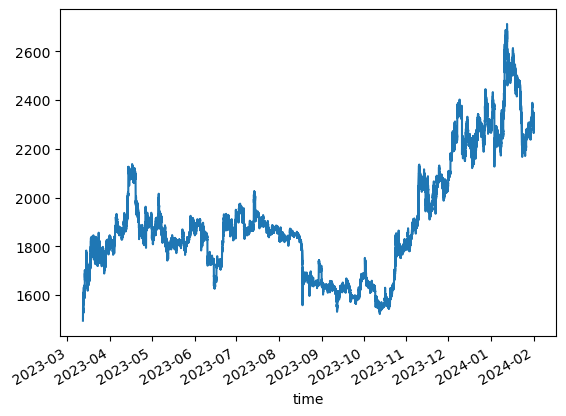

In [37]:
ohlc_minutes.dropna().close.plot()